In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Gathering

In [3]:
data = pd.read_csv("Iris.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Pre-Processing

In [4]:
data.drop(["Id"], axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Labeling

In [5]:
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]

## Initialize Encoder
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

## Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)

## Split
from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    scaledX,encodedY,
    test_size=0.2, random_state=3
)

# Modeling

In [6]:
from sklearn import naive_bayes

## Train Model
model = naive_bayes.GaussianNB()
model.fit(xtrain,ytrain)

## Test Model
ypred = model.predict(xtest)

ypred, ytest

(array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
        2, 1, 0, 2, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
        2, 1, 0, 2, 2, 1, 1, 1]))

In [7]:
ypred == ytest

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [8]:
(ypred==ytest).sum()/len(ytest)

0.9666666666666667

# Evaluate Model

In [9]:
from sklearn.metrics import f1_score, confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(ytest, ypred))
print("F1 Score: ", f1_score(y_true=ytest, y_pred=ypred, average=None))


Confusion Matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
F1 Score:  [1.         0.95238095 0.94736842]


# Visualize on Confusion Metrics

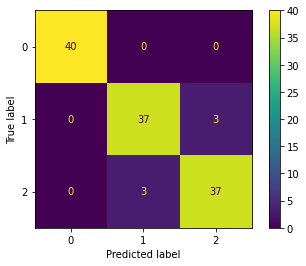

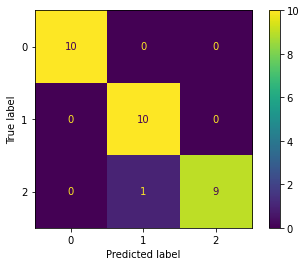

In [11]:
from sklearn import metrics

metrics.plot_confusion_matrix(model, xtrain, ytrain)
metrics.plot_confusion_matrix(model, xtest, ytest)

# Cross Validation Score

In [12]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import cross_val_score
model =  naive_bayes.GaussianNB()
cv = cross_val_score(
    model,scaledX,encodedY,
    cv=5, scoring="accuracy"
)
cv.mean()

0.9533333333333334

# Analyssis & Visualize

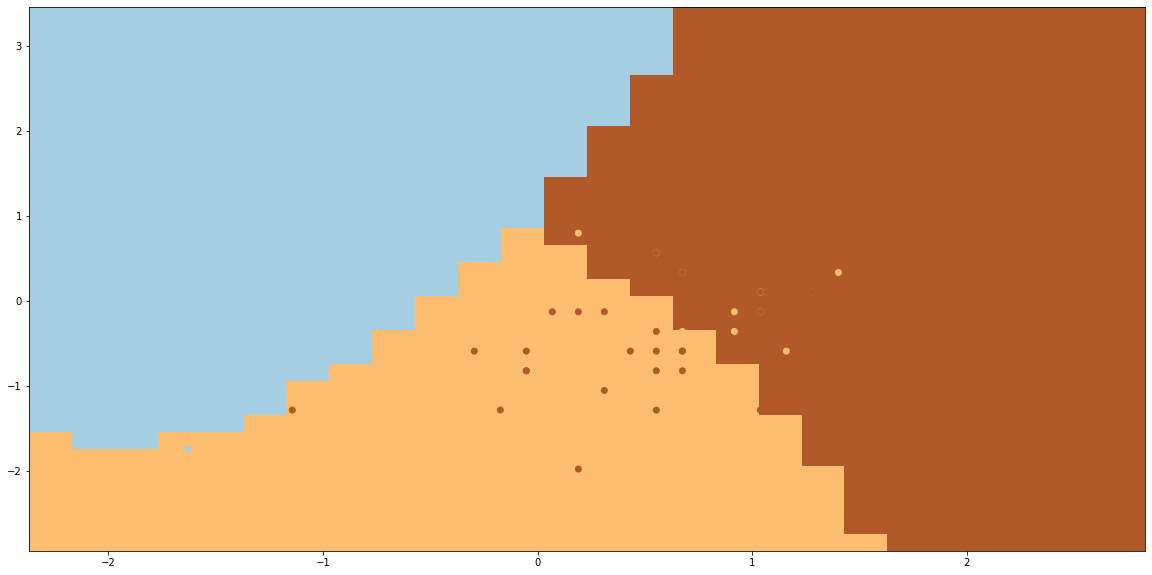

In [13]:
## Analyssis
final_model = naive_bayes.GaussianNB()
final_model.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:,0].min() - .5, scaledX[:,:2][:,0].max() + .5
ymin, ymax = scaledX[:, :2][:,1].min() - .5, scaledX[:,:2][:,1].max() + .5

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2))
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z

## Color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)

## Plot
plt.scatter(scaledX[:, :2][:, 0], scaledX[:, 1],c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()

# Another Analyssis

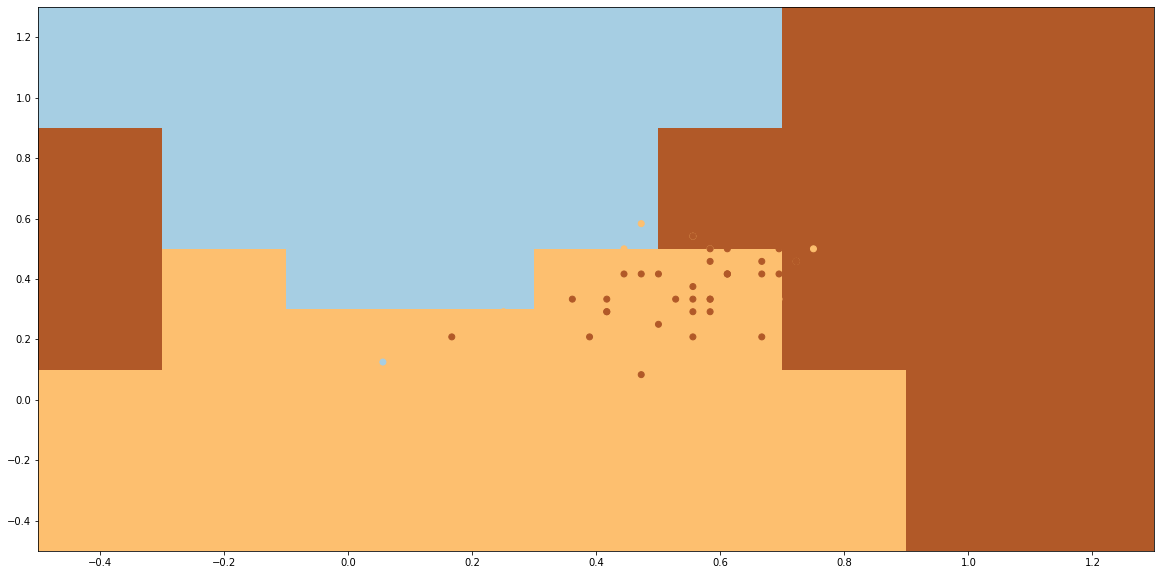

In [15]:
## Labeling
from sklearn.preprocessing import LabelEncoder

X = data[list(data.columns)[:-1]]
Y = data[list(data.columns)[-1]]
Y.value_counts()

## Initialize Encoder
encoder = LabelEncoder()
encodedY = encoder.fit_transform(Y)
encodedY

## Scaling Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X)
scaledX = scaler.transform(X)

mxscaler = MinMaxScaler()
scaledX = mxscaler.fit_transform(X)


## Split
from sklearn import model_selection

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    scaledX,encodedY,
    test_size=0.2, random_state=3
)

## Analyssis
final_model = naive_bayes.GaussianNB()
final_model.fit(scaledX[:, :2], encodedY)

xmin, xmax = scaledX[:, :2][:,0].min() - .5, scaledX[:,:2][:,0].max() + .5
ymin, ymax = scaledX[:, :2][:,1].min() - .5, scaledX[:,:2][:,1].max() + .5

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2))
z = final_model.predict(np.c_[xx.ravel(), yy.ravel()])
z

## Color
z = z.reshape(xx.shape)
plt.figure(1, figsize=(20,10))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, z)

## Plot
plt.scatter(scaledX[:, :2][:, 0], scaledX[:, 1],c=encodedY)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.show()